# Part I - Bike-sharing exploration
## by ('Yomi Okungbure)

## Introduction
> Introduce the dataset
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading the csv file into a dataframe

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In the cells that follow, I will explore the data in hopes to find relationships on a very high level

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df['member_birth_year'].describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
df.member_gender.isna().value_counts()

False    175147
True       8265
Name: member_gender, dtype: int64

In [10]:
df.member_birth_year.isna().value_counts()

False    175147
True       8265
Name: member_birth_year, dtype: int64

In [11]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
df.dropna(subset=['member_gender', 'member_birth_year'], inplace=True)

In [13]:
df.member_birth_year.isna().value_counts()

False    175147
Name: member_birth_year, dtype: int64

In [14]:
df['duration_min'] = df.duration_sec/60

In [15]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,19.116667
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,26.916667
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,26.166667
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,17.483333
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,7.633333


In [16]:
df.member_birth_year = df.member_birth_year.astype(int)

### What is the structure of your dataset?

> There are 183,412 entries within this dataset with 16 features contained in the dataset, a combination of numeric as text data, and also a mix of discrete and continuous variables.


### What is/are the main feature(s) of interest in your dataset?

> I'm curious to see what variables influence ride duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect that age and gender may have the strongest effect on the ride duration, with older people possibly having shorter rides than younger people within the dataset.

## Univariate Exploration

> Having noticed a few things from my initial check into the data, I will begin plotting charts of individual variables to get a better idea of the data

Firstly, we looking into the distribution of duration, I want to explore the relationship between age and the durage of the trips

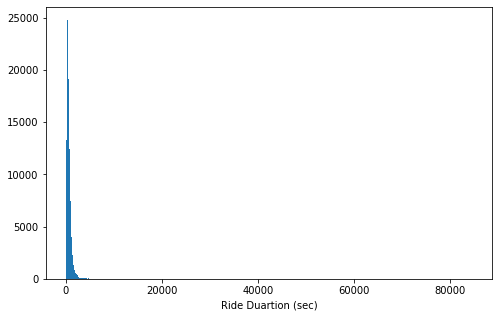

In [17]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Ride Duartion (sec)')
plt.show()

When we plot the first histogram, we see that most of the entries fall between 0 & 10,000 seconds.

Taking a closer look by zooming in below ↓, we see that a hug chunk of the entries are concentrated around 200 to 2,000 seconds

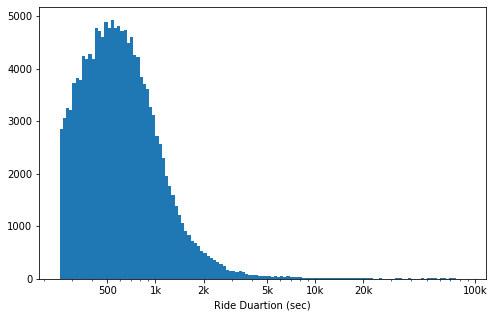

In [18]:
log_binsize = 0.02
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 1e5], [500, '1k', '2k', '5k', '10k', '20k', '100k'])
plt.xlabel('Ride Duartion (sec)')
plt.show()

In [19]:
# In order to get the distribution of the birth years, I use the value_count function to find where most of the entries lie
df.member_birth_year.value_counts(bins = 20).sort_index()

(1877.876, 1884.15]        1
(1884.15, 1890.3]          0
(1890.3, 1896.45]          0
(1896.45, 1902.6]         70
(1902.6, 1908.75]          0
(1908.75, 1914.9]          1
(1914.9, 1921.05]          3
(1921.05, 1927.2]          1
(1927.2, 1933.35]        111
(1933.35, 1939.5]         16
(1939.5, 1945.65]        167
(1945.65, 1951.8]        662
(1951.8, 1957.95]       1981
(1957.95, 1964.1]       6065
(1964.1, 1970.25]       8782
(1970.25, 1976.4]      13491
(1976.4, 1982.55]      23670
(1982.55, 1988.7]      45771
(1988.7, 1994.85]      51363
(1994.85, 2001.0]      22992
Name: member_birth_year, dtype: int64

Then we plot the distributions for the birth years to find the concentration of values

In [20]:
# Here, we're going to create a function that takes two arguments, one for the column name, the other for the binsize
# The function will plot a histtogram for the member_birth_year within the dataset
def plot_hist(x, b):
    bins = np.arange(df[x].min()+50, df[x].max()+b, b)
    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = x, bins = bins)
    plt.xlabel('Birth Year')
    plt.show()

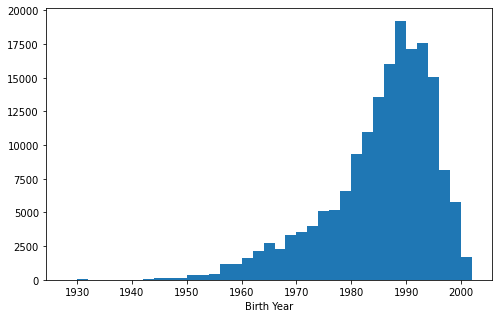

In [21]:
plot_hist('member_birth_year', 2)

Zooming in with a larger bin size, we see that there's a large concentration between those born in 1970 & 2000

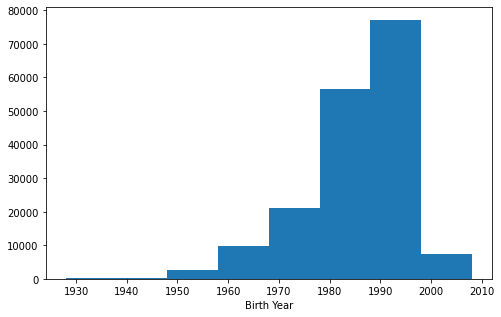

In [22]:
plot_hist('member_birth_year', 10)

Adjusting the x axis of the birth year

And finally, we check the distribution according to gender to get a better idea of the dataset

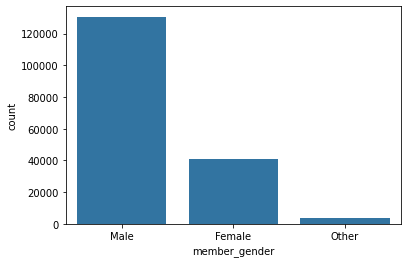

In [23]:
base_color = sb.color_palette()[0]
freq = df['member_gender'].value_counts()
gen_order = freq.index
sb.countplot(data=df, x ='member_gender', color=base_color, order=gen_order);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I started out by plotting a histogram for the duration in seconds and quickly realized that the concentration of observations was between the 0 - 10,000 second mark, since this was the case, I plotted the histogram again on a logarithmic scale to zoom in on the values and have a better understanding on the distribution.
It became clearer that the dataset is right skewed with most of the entries falling between 0 and 5000 seconds, though outliers exist beyond that point.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> First up, the birth year, my expectation was that the birth year of people within the data set would have significant effect on the volume of trips, sure enough once I plotted the histogram, it was easy to see a left-skewed chart with more volume between birth years of 1940 and 2001. The outliers within the dataset were not significant enough in terms of volume to investigate further.
Then finally the gender shows that most of the records are male, followed by female and other, respectively.

## Bivariate Exploration

Checking the relationship between year of birth and duration in minutes

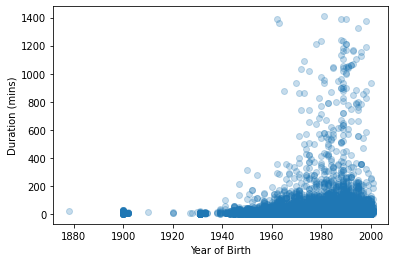

In [24]:
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_min', alpha=5/20);
plt.xlabel('Year of Birth')
plt.ylabel('Duration (mins)');

Now, we plot a heat map to get a clearer picture of the concentration of entries

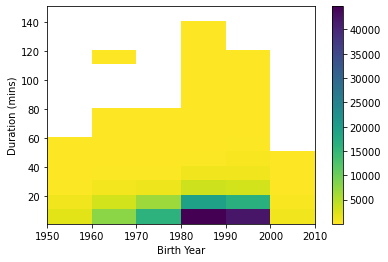

In [25]:
bins_x = np.arange(1950, 2001+10, 10)
bins_y = np.arange(1, 150+10, 10)
plt.hist2d(data = df, x = 'member_birth_year', y = 'duration_min', cmin=15, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Birth Year')
plt.ylabel('Duration (mins)');

From the above heatmap, the points between 1980 and 2000 have the highest concentration of points,
so we filter the dataframe for the most saturated years of birth

In [26]:
#  First filter between 1980 & 1990
df_1 = df[(df['member_birth_year'] >= 1980) & (df['member_birth_year'] <= 1990)]

In [27]:
df_1.count()

duration_sec               77760
start_time                 77760
end_time                   77760
start_station_id           77659
start_station_name         77659
start_station_latitude     77760
start_station_longitude    77760
end_station_id             77659
end_station_name           77659
end_station_latitude       77760
end_station_longitude      77760
bike_id                    77760
user_type                  77760
member_birth_year          77760
member_gender              77760
bike_share_for_all_trip    77760
duration_min               77760
dtype: int64

In [28]:
df_1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min
count,77760.000000,77659.000000,77760.000000,77760.000000,77659.000000,77760.000000,77760.000000,77760.000000,77760.000000,77760.000000
mean,707.431996,129.869906,37.781945,-122.370744,127.380613,37.782146,-122.370128,4530.845679,1985.745306,11.790533
std,1762.526103,107.768293,0.060145,0.082011,106.751135,0.060012,0.081622,1649.963974,3.041622,29.375435
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1980.000000,1.016667
25%,328.000000,47.000000,37.771058,-122.413004,43.000000,37.771058,-122.411738,4319.000000,1983.000000,5.466667
50%,516.000000,95.000000,37.780450,-122.398870,93.000000,37.780526,-122.398773,4994.000000,1986.000000,8.600000
75%,792.000000,195.000000,37.795392,-122.390288,190.000000,37.795392,-122.390288,5524.000000,1988.000000,13.200000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,1990.000000,1409.133333


In [29]:
# Second filter between 1991 & 2002
df_2 = df[(df['member_birth_year'] > 1990) & (df['member_birth_year'] <= 2002)]

In [30]:
df_2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,17.483333
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,7.633333
11,506,2019-02-28 23:56:55.5400,2019-03-01 00:05:21.7330,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993,Male,No,8.433333
15,208,2019-02-28 23:59:18.5480,2019-03-01 00:02:47.2280,349.0,Howard St at Mary St,37.781010,-122.405666,60.0,8th St at Ringold St,37.774520,-122.409449,6361,Subscriber,1993,Male,Yes,3.466667
22,743,2019-02-28 23:44:56.4390,2019-02-28 23:57:20.2120,370.0,Jones St at Post St,37.787327,-122.413278,52.0,McAllister St at Baker St,37.777416,-122.441838,5479,Subscriber,1991,Female,No,12.383333


In [31]:
df_2.count()

duration_sec               56725
start_time                 56725
end_time                   56725
start_station_id           56660
start_station_name         56660
start_station_latitude     56725
start_station_longitude    56725
end_station_id             56660
end_station_name           56660
end_station_latitude       56725
end_station_longitude      56725
bike_id                    56725
user_type                  56725
member_birth_year          56725
member_gender              56725
bike_share_for_all_trip    56725
duration_min               56725
dtype: int64

In [32]:
# Here we create an age column in the first filtered dataframe
df_1['age'] = 2022 - df_1.member_birth_year

C:\Users\MSI GP63\AppData\Local\Temp\ipykernel_25392\1517250192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['age'] = 2022 - df_1.member_birth_year


In [33]:
# Here we create an age column in the second filtered dataframe
df_2['age'] = 2022 - df_2.member_birth_year

C:\Users\MSI GP63\AppData\Local\Temp\ipykernel_25392\931747696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['age'] = 2022 - df_2.member_birth_year


In [34]:
df_1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age
count,77760.000000,77659.000000,77760.000000,77760.000000,77659.000000,77760.000000,77760.000000,77760.000000,77760.000000,77760.000000,77760.000000
mean,707.431996,129.869906,37.781945,-122.370744,127.380613,37.782146,-122.370128,4530.845679,1985.745306,11.790533,36.254694
std,1762.526103,107.768293,0.060145,0.082011,106.751135,0.060012,0.081622,1649.963974,3.041622,29.375435,3.041622
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1980.000000,1.016667,32.000000
25%,328.000000,47.000000,37.771058,-122.413004,43.000000,37.771058,-122.411738,4319.000000,1983.000000,5.466667,34.000000
50%,516.000000,95.000000,37.780450,-122.398870,93.000000,37.780526,-122.398773,4994.000000,1986.000000,8.600000,36.000000
75%,792.000000,195.000000,37.795392,-122.390288,190.000000,37.795392,-122.390288,5524.000000,1988.000000,13.200000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,1990.000000,1409.133333,42.000000


In [35]:
df_2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age
count,56725.000000,56660.000000,56725.000000,56725.000000,56660.000000,56725.000000,56725.000000,56725.000000,56725.000000,56725.000000,56725.000000
mean,688.588911,161.594846,37.749784,-122.316132,159.114419,37.749973,-122.315816,4498.883032,1994.204584,11.476482,27.795416
std,1566.477241,116.346070,0.147388,0.160065,116.696135,0.147308,0.159607,1617.731202,2.485225,26.107954,2.485225
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1991.000000,1.016667,21.000000
25%,312.000000,58.000000,37.767100,-122.411647,58.000000,37.768265,-122.410345,3890.000000,1992.000000,5.200000,26.000000
50%,498.000000,130.000000,37.780526,-122.395282,126.000000,37.780955,-122.395282,4933.000000,1994.000000,8.300000,28.000000
75%,772.000000,256.000000,37.804770,-122.265320,258.000000,37.804770,-122.266318,5499.000000,1996.000000,12.866667,30.000000
max,82512.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1375.200000,31.000000


Checking heatmap of the first dataframe, it seems younger people between the age of 30 to 40 have longer bike rides

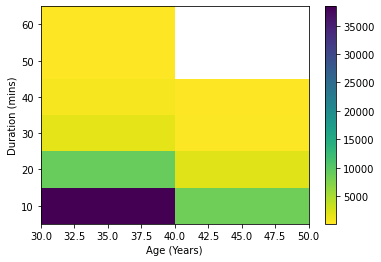

In [36]:
bins_x = np.arange(30, 42+10, 10)
bins_y = np.arange(5, 60+10, 10)
plt.hist2d(data = df_1, x = 'age', y = 'duration_min', cmin=100, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age (Years)')
plt.ylabel('Duration (mins)');

Following the heatmap, I rendered a scatter plot and we can see that 33 year olds have the highest number of rides within the service

Text(0, 0.5, 'Duration (Mins)')

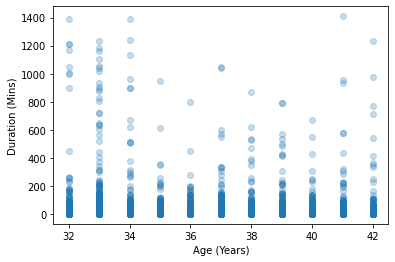

In [37]:
plt.scatter(data = df_1, x = 'age', y = 'duration_min', alpha=5/20);
plt.xlabel('Age (Years)')
plt.ylabel('Duration (Mins)')

Plotting a histogram we see that this reinforces that insight, younger people have longer rides

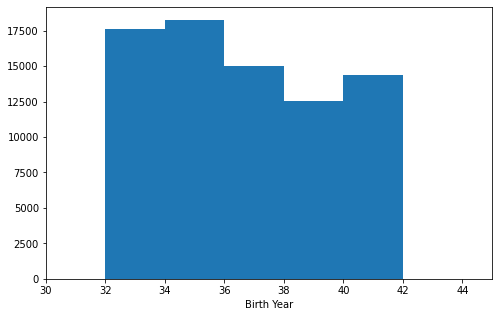

In [38]:
binsize = 2
bins = np.arange(0, df_1['age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_1, x = 'age', bins = bins)
plt.xlim([30,45])
plt.xlabel('Birth Year')
plt.show()

And finally, we check the gender distribution of the entries within df_1,
most of the riders are male, withe the highest number aged 34 years old

<AxesSubplot:xlabel='age', ylabel='count'>

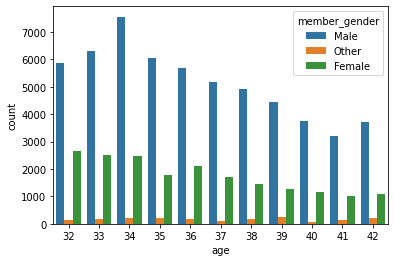

In [39]:
sb.countplot(data = df_1, x = 'age', hue = 'member_gender')

We do the same for the 2nd batch of filtered data, here we see again in the heatmap that thosed aged between 27 & 32 have the highest duration of rides

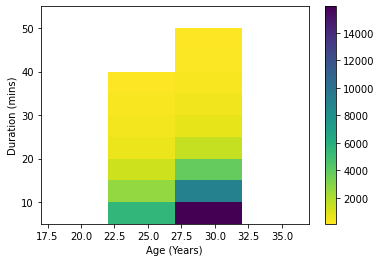

In [40]:
bins_x = np.arange(17, 33+5, 5)
bins_y = np.arange(5, 55+5, 5)
plt.hist2d(data = df_2, x = 'age', y = 'duration_min', cmin=100, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age (Years)')
plt.ylabel('Duration (mins)');

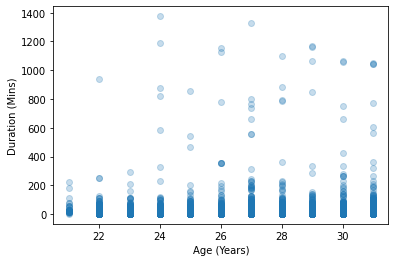

In [41]:
plt.scatter(data = df_2, x = 'age', y = 'duration_min', alpha=5/20);
plt.xlabel('Age (Years)')
plt.ylabel('Duration (Mins)');

The histogram below is left skewed, showing a higher number of riders within that same range

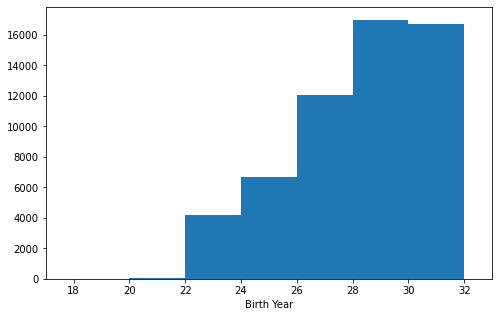

In [42]:
binsize = 2
bins = np.arange(0, df_2['age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_2, x = 'age', bins = bins)
plt.xlim([17,33])
plt.xlabel('Birth Year')
plt.show()

And the dataset of riders is dominated by males, with the highest count being those aged 29 years old

<AxesSubplot:xlabel='age', ylabel='count'>

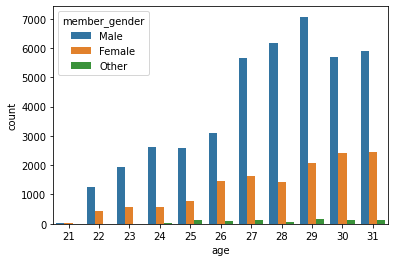

In [43]:
sb.countplot(data = df_2, x = 'age', hue = 'member_gender')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the exploration of the data, I found that the ride duration was strongly tied to the age of the riders,
Those born in more recent years, this could be due several factors,
among which maybe health, younger people tend to be healthier than older ones, also younger people tend to be much more active.


## Multivariate Exploration
 > Here I just created a scatter matrix to see if there was another relationship to uncover

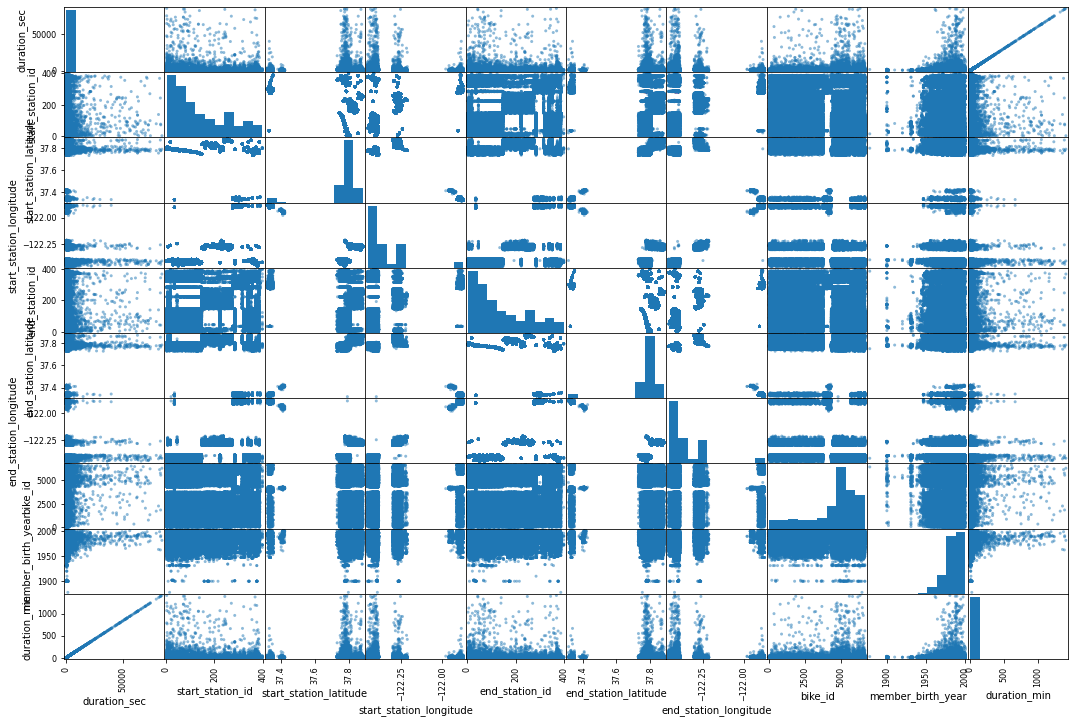

In [44]:
pd.plotting.scatter_matrix(df, figsize=(18,12),);

As I couldn't find any worthwhile relationship, I decided to conclude the exploratory analysis here

## Conclusions

In the exploration of the data, I found that the ride duration was strongly tied to the age of the riders,
Those born in more recent years, this could be due several factors,
among which maybe health, younger people tend to be healthier than older ones, also younger people tend to be much more active.
